In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as smf
import statsmodels.formula.api as sm
import seaborn as sns

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/arib168/data/main/50_Startups.csv')

In [3]:
df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [4]:
df.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [5]:
#sns.pairplot(data = df.drop(columns='Profit'))

In [6]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
df2 = df.drop(columns=['Profit', 'State'])
x = add_constant(df)
vif = pd.DataFrame()
vif['Features'] = df2.columns
vif['VIF'] = [variance_inflation_factor(df2.values, i) for i in range(len(df2.columns))]
vif

,Features,VIF
0,R&D Spend,8.384571
1,Administration,4.026406
2,Marketing Spend,7.593984


In [7]:
df.columns = ['R&D_Spend', 'Administration', 'Marketing_Spend', 'State', 'Profit']

<AxesSubplot:xlabel='Marketing_Spend', ylabel='Profit'>

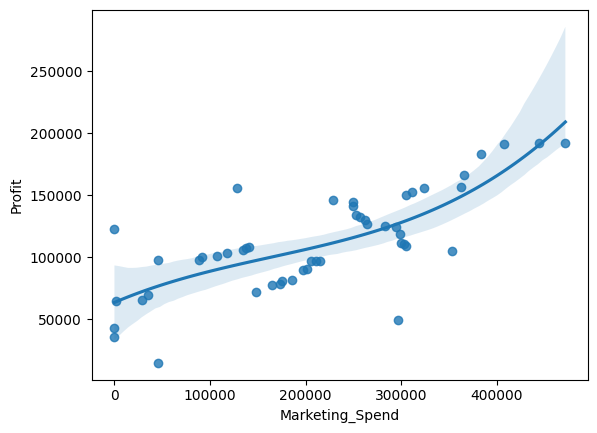

In [8]:
sns.regplot(data = df, x = df.Marketing_Spend, y = df.Profit, order = 3)

In [9]:
fit1 = sm.ols('Profit~Administration**5+Marketing_Spend**3', data=df).fit()

In [10]:
fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     36.71
Date:                Wed, 22 Mar 2023   Prob (F-statistic):           2.50e-10
Time:                        18:45:55   Log-Likelihood:                -577.13
No. Observations:                  50   AIC:                             1160.
Df Residuals:                      47   BIC:                             1166.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.022e+04   1.77e+04      1.143      0.259   -1.54e+04    5.58e+04
Administration      0.3237      0.131      2.468      0.017       0.060       0.588
Marketing_Spend     0.2488      0.030      8.281      0.000       0.188       0.309
==============================================================================
Omnibus:                        6.584   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.037   Jarque-Bera (JB):                6.524
Skew:                          -0.512   Prob(JB):                       0.0383
Kurtosis:                       4.443   Cond. No.                     1.30e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.3e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [11]:
oneHotEncoding = pd.get_dummies(data=df, columns=['State'])

In [12]:
oneHotEncoding

,R&D_Spend,Administration,Marketing_Spend,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0
5,131876.90,99814.71,362861.36,156991.12,0,0,1
6,134615.46,147198.87,127716.82,156122.51,1,0,0
7,130298.13,145530.06,323876.68,155752.60,0,1,0
8,120542.52,148718.95,311613.29,152211.77,0,0,1
9,123334.88,108679.17,304981.62,149759.96,1,0,0


In [21]:
oneHotEncoding.columns = ['RandD_Spend', 'Administration', 'Marketing_Spend', 'Profit', 'State_California', 'State_Florida', 'State_New_York']
fit2 = sm.ols('Profit~RandD_Spend+State_California+State_Florida+State_New_York', data=oneHotEncoding).fit()

In [22]:
fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     272.4
Date:                Wed, 22 Mar 2023   Prob (F-statistic):           2.76e-29
Time:                        18:47:35   Log-Likelihood:                -527.35
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      46   BIC:                             1070.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         3.686e+04   1959.786     18.806      0.000    3.29e+04    4.08e+04
RandD_Spend          0.8530      0.030     28.226      0.000       0.792       0.914
State_California  1.189e+04   1956.677      6.079      0.000    7955.697    1.58e+04
State_Florida     1.306e+04   2122.665      6.152      0.000    8785.448    1.73e+04
State_New_York     1.19e+04   2036.022      5.847      0.000    7805.580     1.6e+04
==============================================================================
Omnibus:                       13.418   Durbin-Watson:                   1.122
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               17.605
Skew:                          -0.907   Prob(JB):                     0.000150
Kurtosis:                       5.271   Cond. No.                     1.71e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.29e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""